### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
import math

%matplotlib inline

In [4]:
%pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=026f73770bd1d9978aeae10360cb92dd01d3d709aa7a92ebcab2a4719a0fe11b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


### Read data

In [6]:
data = pd.read_csv("accident.csv", thousands='.', skipinitialspace=True)


data

Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
2     46    Male             46.0         Yes           Yes         0
3     32    Male            117.0          No           Yes         0
4     60  Female             40.0         Yes           Yes         0
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[200 rows x 6 columns]

### Drop empty lines in data and remove NAN's

In [7]:
data = data.dropna()
data

Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
2     46    Male             46.0         Yes           Yes         0
3     32    Male            117.0          No           Yes         0
4     60  Female             40.0         Yes           Yes         0
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[196 rows x 6 columns]

### Reset the index for potentially removed rows in data

In [8]:
data = data.reset_index(drop=True)

## EDA - Exploratory Data Analysis

### View data statistics - short format

In [9]:
data.describe()

Age  Speed_of_Impact    Survived
count  196.000000       196.000000  196.000000
mean    43.341837        70.433673    0.510204
std     15.004973        30.202236    0.501176
min     18.000000        20.000000    0.000000
25%     31.000000        43.000000    0.000000
50%     44.000000        71.000000    1.000000
75%     56.000000        95.500000    1.000000
max     69.000000       119.000000    1.000000

### View data statistics - long format

In [10]:
profile = ProfileReport(data, title="Accident Data Analysis")


In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 87.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
data['Survived'].value_counts(normalize=True) * 100

Survived
1    51.020408
0    48.979592
Name: proportion, dtype: float64

#### Important: We have 51.02% samples survived and 48.97% samples didn't survived in our dataset

### Change categorical string/boolean columns to categorical integer columns

In [19]:
data['Age'] = data['Age'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Speed_of_Impact'] = data['Speed_of_Impact'].astype('category').cat.codes
data['Helmet_Used'] = data['Helmet_Used'].astype('category').cat.codes
data['Seatbelt_Used'] = data['Seatbelt_Used'].astype('category').cat.codes
data['Survived'] = data['Survived'].astype('category').cat.codes


In [21]:
data

Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0     38       0                6            0              0         1
1     50       0               24            0              1         1
2     28       1               24            1              1         0
3     14       1               77            0              1         0
4     42       0               18            1              1         0
..   ...     ...              ...          ...            ...       ...
191   50       0               71            0              1         1
192   12       0               28            0              1         1
193   40       1               70            0              1         1
194    2       1               64            0              1         1
195   38       0               21            0              1         1

[196 rows x 6 columns]

### Create x and y from original data

In [25]:
x_data = data.drop(columns=['Survived'])
x_data

Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used
0     38       0                6            0              0
1     50       0               24            0              1
2     28       1               24            1              1
3     14       1               77            0              1
4     42       0               18            1              1
..   ...     ...              ...          ...            ...
191   50       0               71            0              1
192   12       0               28            0              1
193   40       1               70            0              1
194    2       1               64            0              1
195   38       0               21            0              1

[196 rows x 5 columns]

In [26]:
y_data = data[['Survived']]
y_data

Survived
0           1
1           1
2           0
3           0
4           0
..        ...
191         1
192         1
193         1
194         1
195         1

[196 rows x 1 columns]

### View features against Churn

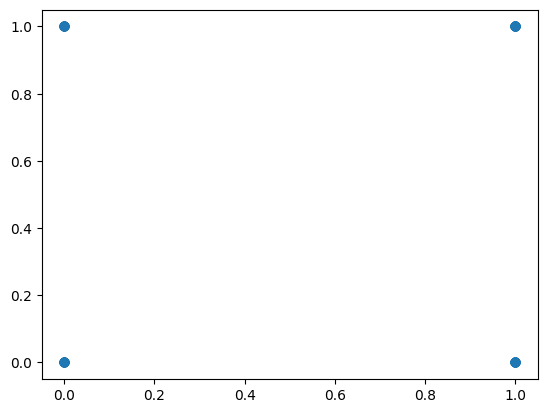

In [27]:
plt.scatter(x_data['Seatbelt_Used'], y_data)


### Split data into training and validation datasets: Default 80% train, 20% validation

In [29]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

### Visualize how one sample looks like

In [30]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

In [31]:
x_train[0]

array([14,  0, 57,  0,  0], dtype=int8)

### Visualize the nuber of training samples and number of validation samples

In [32]:
len(y_train), len(y_validation)

(156, 40)

In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int8), array([76, 80]))

In [35]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int8), array([20, 20]))

### Standardization - mean and standard deviation calculation

In [36]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [37]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [38]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [39]:
x_train.min(), x_train.max()

(np.float64(-1.80671184824895), np.float64(1.6356031676780278))

### View min and max values after standardization from training dataset

In [40]:
x_validation.min(), x_validation.max()

(np.float64(-1.80671184824895), np.float64(1.6356031676780278))

### Logistic Regression implementation

In [41]:
def sigmoid(x):
    g = 1 / (1 + np.exp(-x))
    return g

#### Examples of using sigmoid values

In [42]:
sigmoid(1)

np.float64(0.7310585786300049)

In [43]:
sigmoid(0)

np.float64(0.5)

In [44]:
sigmoid(-1)

np.float64(0.2689414213699951)

In [45]:
sigmoid(-1000)

<ipython-input-41-0b81d26b1f5a>:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


np.float64(0.0)

In [46]:
sigmoid(100)

np.float64(1.0)

In [52]:
import os
os.makedirs("model", exist_ok=True) #rezolvare problema cand nu exista fisierul

In [54]:
def compute_cost(X, y, w, b, lambda_=1):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = cost / m
    return cost

In [55]:
def compute_gradient(X, y, w, b, lambda_=1):
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]      #scalar
        dj_db += err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [56]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):
    # number of training examples

    m = len(x_train)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_train_b.npy', b_in)


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_valid_b.npy', b_in)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")

    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [62]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 0.01 #am modificat alpha pentru a antrena mai bine
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

<ipython-input-55-ca3a02e9c328>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.693040 	  Cost Validation: 0.693088
Iteration  100: Cost Train: 0.684336 	  Cost Validation: 0.688927
Iteration  200: Cost Train: 0.678583 	  Cost Validation: 0.687225
Iteration  300: Cost Train: 0.674759 	  Cost Validation: 0.686940
Iteration  400: Cost Train: 0.672200 	  Cost Validation: 0.687432
Iteration  500: Cost Train: 0.670476 	  Cost Validation: 0.688317
Iteration  600: Cost Train: 0.669307 	  Cost Validation: 0.689366
Iteration  700: Cost Train: 0.668511 	  Cost Validation: 0.690448
Iteration  800: Cost Train: 0.667966 	  Cost Validation: 0.691490
Iteration  900: Cost Train: 0.667592 	  Cost Validation: 0.692452
Iteration  999: Cost Train: 0.667335 	  Cost Validation: 0.693312


In [63]:
best_w_final = np.load('model/best_valid_w_in.npy')
best_b_final = np.load('model/best_valid_b.npy')

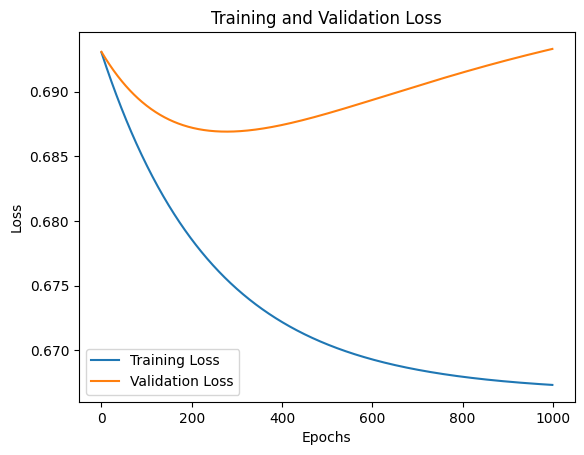

In [65]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)

# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')

# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))

# Display the plot
plt.legend(loc='best')
plt.show()

In [66]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5

    return p

In [68]:
y_predicted = predict(x_train, w_final, b_final)

<ipython-input-66-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [69]:
y_train.shape

(156, 1)

In [70]:
y_train.reshape(-1).shape, y_predicted.shape

((156,), (156,))

In [71]:
(y_train.reshape(-1) == y_predicted).sum()

np.int64(92)

In [73]:
x_train.shape
x_train.shape

(156, 5)

In [74]:
y_train = y_train.reshape(-1)

In [75]:
type(y_predicted)

numpy.ndarray

In [76]:
def metrics_computations(x:np.array,
                         y_true:np.array,
                         y_predicted: np.array):
    total_number_of_samples = x.shape[0]
    accuracy = (y_true == y_predicted).sum() / total_number_of_samples
    true_positive = ((y_predicted == 1) & (y_true == 1)).sum()
    false_positive = ((y_predicted == 1) & (y_true == 0)).sum()
    false_negative = ((y_predicted == 0) & (y_true == 1)).sum()
    true_negative = ((y_predicted == 0) & (y_true == 0)).sum()

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    f1_score = (2 * precision * recall) / (precision + recall)

    false_negative_rate = false_negative / (false_negative + true_positive)
    false_positive_rate = false_positive / (false_positive + true_negative)

    return (accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate)

In [77]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [78]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 58.97% 
 Precision: 59.09% 
 Recall: 65.00% 
 F1 Score: 61.90% 
 Specificity: 52.63% 
 False Positive Rate: 47.37% 
 False Negative Rate: 35.00%


In [79]:
y_predicted_validation = predict(x_validation, w_final, b_final)

<ipython-input-66-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [80]:
y_validation = y_validation.reshape(-1)

In [81]:
for i, j in zip(y_validation, y_predicted_validation):
    print(i, j)

0 0.0
1 0.0
1 0.0
1 1.0
0 1.0
1 0.0
0 1.0
1 0.0
1 0.0
1 1.0
1 0.0
1 0.0
0 1.0
1 1.0
0 0.0
0 1.0
1 0.0
0 1.0
0 1.0
0 0.0
1 1.0
1 0.0
1 0.0
0 0.0
0 0.0
1 0.0
0 1.0
0 0.0
1 0.0
0 0.0
0 0.0
1 0.0
0 1.0
0 0.0
0 1.0
0 0.0
0 0.0
1 1.0
1 0.0
1 1.0


In [82]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

In [83]:
print(f"[Valid] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[Valid] Accuracy: 42.50% 
 Precision: 40.00% 
 Recall: 30.00% 
 F1 Score: 34.29% 
 Specificity: 55.00% 
 False Positive Rate: 45.00% 
 False Negative Rate: 70.00%


### Analyze the feature importance

<Axes: ylabel='Feature'>

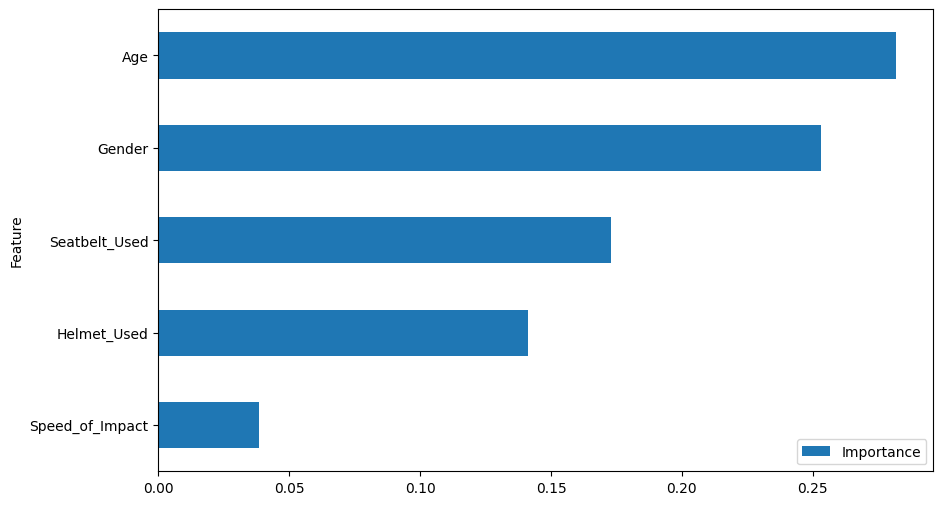

In [84]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### Add polynomial features for improving model capacity

In [85]:
#pip install scikit-learn
from sklearn import preprocessing

In [86]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=False, include_bias=False)

In [87]:
poly_values = poly.fit_transform(x_data)
poly_values

array([[38.,  0.,  6., ...,  0.,  0.,  0.],
       [50.,  0., 24., ...,  0.,  0.,  1.],
       [28.,  1., 24., ...,  1.,  1.,  1.],
       ...,
       [40.,  1., 70., ...,  0.,  0.,  1.],
       [ 2.,  1., 64., ...,  0.,  0.,  1.],
       [38.,  0., 21., ...,  0.,  0.,  1.]])

In [88]:
poly_column_names = list(poly.get_feature_names_out(x_data.columns))
poly_column_names

['Age',
 'Gender',
 'Speed_of_Impact',
 'Helmet_Used',
 'Seatbelt_Used',
 'Age^2',
 'Age Gender',
 'Age Speed_of_Impact',
 'Age Helmet_Used',
 'Age Seatbelt_Used',
 'Gender^2',
 'Gender Speed_of_Impact',
 'Gender Helmet_Used',
 'Gender Seatbelt_Used',
 'Speed_of_Impact^2',
 'Speed_of_Impact Helmet_Used',
 'Speed_of_Impact Seatbelt_Used',
 'Helmet_Used^2',
 'Helmet_Used Seatbelt_Used',
 'Seatbelt_Used^2']

In [89]:
x_data = pd.DataFrame(poly_values, columns=poly_column_names)
x_data

Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used   Age^2  \
0    38.0     0.0              6.0          0.0            0.0  1444.0   
1    50.0     0.0             24.0          0.0            1.0  2500.0   
2    28.0     1.0             24.0          1.0            1.0   784.0   
3    14.0     1.0             77.0          0.0            1.0   196.0   
4    42.0     0.0             18.0          1.0            1.0  1764.0   
..    ...     ...              ...          ...            ...     ...   
191  50.0     0.0             71.0          0.0            1.0  2500.0   
192  12.0     0.0             28.0          0.0            1.0   144.0   
193  40.0     1.0             70.0          0.0            1.0  1600.0   
194   2.0     1.0             64.0          0.0            1.0     4.0   
195  38.0     0.0             21.0          0.0            1.0  1444.0   

     Age Gender  Age Speed_of_Impact  Age Helmet_Used  Age Seatbelt_Used  \
0           0.0                228.0              0.0                0.0   
1           0.0               1200.0              0.0               50.0   
2          28.0                672.0             28.0               28.0   
3          14.0               1078.0              0.0               14.0   
4           0.0                756.0             42.0               42.0   
..          ...                  ...              ...                ...   
191         0.0               3550.0              0.0               50.0   
192         0.0                336.0              0.0               12.0   
193        40.0               2800.0              0.0               40.0   
194         2.0                128.0              0.0                2.0   
195         0.0                798.0              0.0               38.0   

     Gender^2  Gender Speed_of_Impact  Gender Helmet_Used  \
0         0.0                     0.0                 0.0   
1         0.0                     0.0                 0.0   
2         1.0                    24.0                 1.0   
3         1.0                    77.0                 0.0   
4         0.0                     0.0                 0.0   
..        ...                     ...                 ...   
191       0.0                     0.0                 0.0   
192       0.0                     0.0                 0.0   
193       1.0                    70.0                 0.0   
194       1.0                    64.0                 0.0   
195       0.0                     0.0                 0.0   

     Gender Seatbelt_Used  Speed_of_Impact^2  Speed_of_Impact Helmet_Used  \
0                     0.0               36.0                          0.0   
1                     0.0              576.0                          0.0   
2                     1.0              576.0                         24.0   
3                     1.0             5929.0                          0.0   
4                     0.0              324.0                         18.0   
..                    ...                ...                          ...   
191                   0.0             5041.0                          0.0   
192                   0.0              784.0                          0.0   
193                   1.0             4900.0                          0.0   
194                   1.0             4096.0                          0.0   
195                   0.0              441.0                          0.0   

     Speed_of_Impact Seatbelt_Used  Helmet_Used^2  Helmet_Used Seatbelt_Used  \
0                              0.0            0.0                        0.0   
1                             24.0            0.0                        0.0   
2                             24.0            1.0                        1.0   
3                             77.0            0.0                        0.0   
4                             18.0            1.0                        1.0   
..                             ...            ...                 

In [90]:
x_data.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Age^2', 'Age Gender', 'Age Speed_of_Impact', 'Age Helmet_Used',
       'Age Seatbelt_Used', 'Gender^2', 'Gender Speed_of_Impact',
       'Gender Helmet_Used', 'Gender Seatbelt_Used', 'Speed_of_Impact^2',
       'Speed_of_Impact Helmet_Used', 'Speed_of_Impact Seatbelt_Used',
       'Helmet_Used^2', 'Helmet_Used Seatbelt_Used', 'Seatbelt_Used^2'],
      dtype='object')

### Split data into training and validation datasets: Default 80% train, 20% validation

In [91]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [92]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [93]:
x_train[0]

array([  14.,    0.,   57.,    0.,    0.,  196.,    0.,  798.,    0.,
          0.,    0.,    0.,    0.,    0., 3249.,    0.,    0.,    0.,
          0.,    0.])

### Visualize the nuber of training samples and number of validation samples

In [94]:
len(y_train), len(y_validation)

(156, 40)

In [95]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int8), array([76, 80]))

In [96]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int8), array([20, 20]))

### Standardization - mean and standard deviation calculation

In [97]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [98]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [99]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [100]:
x_train.min(), x_train.max()

(np.float64(-1.80671184824895), np.float64(2.7044880254869264))

### View min and max values after standardization from training dataset

In [101]:
x_validation.min(), x_validation.max()

(np.float64(-1.80671184824895), np.float64(2.504004933700781))

### Train with polynomial features

In [102]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):
    # number of training examples
    m = len(x_train)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_poly_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_train_b.npy', b_in)


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_poly_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_valid_b.npy', b_in)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")

    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [103]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 0.3
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

<ipython-input-55-ca3a02e9c328>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.681075 	  Cost Validation: 0.687000
Iteration  100: Cost Train: 0.624302 	  Cost Validation: 0.706563
Iteration  200: Cost Train: 0.618431 	  Cost Validation: 0.719365
Iteration  300: Cost Train: 0.616668 	  Cost Validation: 0.726132
Iteration  400: Cost Train: 0.615877 	  Cost Validation: 0.730075
Iteration  500: Cost Train: 0.615429 	  Cost Validation: 0.732617
Iteration  600: Cost Train: 0.615141 	  Cost Validation: 0.734373
Iteration  700: Cost Train: 0.614942 	  Cost Validation: 0.735649
Iteration  800: Cost Train: 0.614800 	  Cost Validation: 0.736611
Iteration  900: Cost Train: 0.614698 	  Cost Validation: 0.737362
Iteration  999: Cost Train: 0.614623 	  Cost Validation: 0.737958


In [104]:
best_poly_w_final = np.load('model/best_poly_valid_w_in.npy')
best_poly_b_final = np.load('model/best_poly_valid_b.npy')

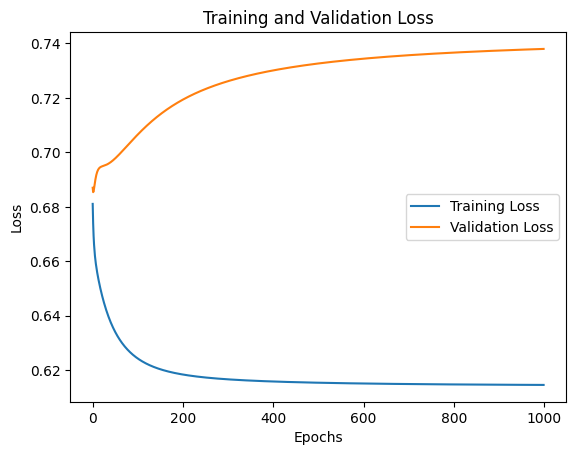

In [105]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)

# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')

# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))

# Display the plot
plt.legend(loc='best')
plt.show()

In [106]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        # Loop over each feature
        for j in range(n):
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]

        # Add bias term
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5

    return p

In [107]:
y_predicted = predict(x_train, w_final, b_final)

<ipython-input-106-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [108]:
y_train.shape

(156, 1)

In [109]:
y_train.reshape(-1).shape, y_predicted.shape

((156,), (156,))

In [110]:
(y_train.reshape(-1) == y_predicted).sum()

np.int64(95)

In [111]:
y_train = y_train.reshape(-1)

In [112]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [113]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 60.90% 
 Precision: 60.92% 
 Recall: 66.25% 
 F1 Score: 63.47% 
 Specificity: 55.26% 
 False Positive Rate: 44.74% 
 False Negative Rate: 33.75%


In [114]:
y_predicted_validation = predict(x_validation, w_final, b_final)

<ipython-input-106-bde3be517903>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [115]:
y_validation = y_validation.reshape(-1)

In [116]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

In [117]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 57.50% 
 Precision: 57.14% 
 Recall: 60.00% 
 F1 Score: 58.54% 
 Specificity: 55.00% 
 False Positive Rate: 45.00% 
 False Negative Rate: 40.00%


### Analyze the feature importance

<Axes: ylabel='Feature'>

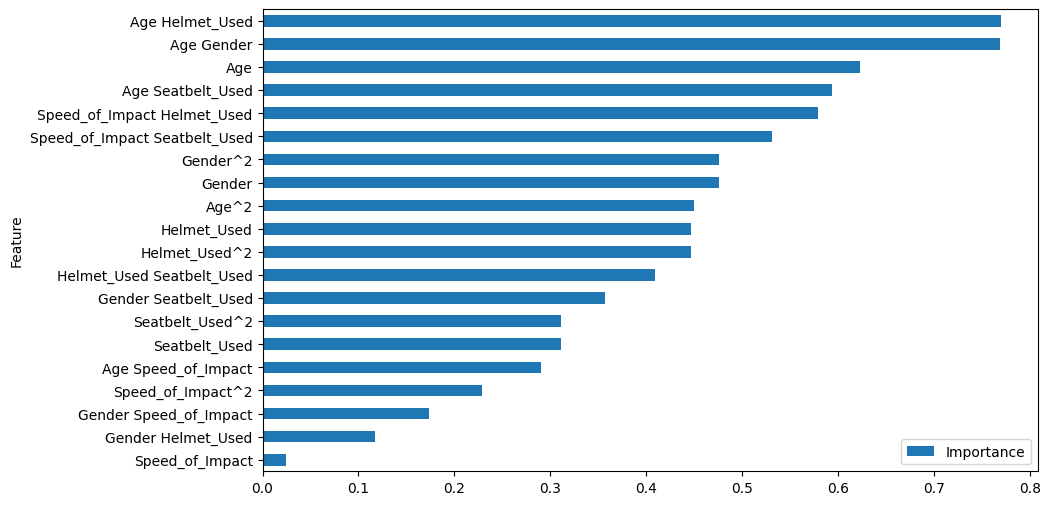

In [118]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.tail(20).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

#### For example most important feature is obtained by multipling two features: Age Helmet_Used and Age Gender

### Decision Tree
#### Specialized in learning non-linear data
#### No need for Normalization/Standardization
#### No need for Polynomial Feature Transformation

In [121]:
x_data = data.drop(columns=['Survived'])

### Split data into training and validation datasets: Default 80% train, 20% validation

In [122]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [123]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [124]:
x_train[0]

array([14,  0, 57,  0,  0], dtype=int8)

### Visualize the nuber of training samples and number of validation samples

In [125]:
len(y_train), len(y_validation)

(156, 40)

In [127]:
survival_counts = y_data.value_counts(normalize=True) * 100
print(survival_counts)


Survived
1           51.020408
0           48.979592
Name: proportion, dtype: float64


### Visualize the number of no churn vs churn samples in training dataset

#### Having 51.02% samples that did not survive and 48.97% samples that survived in our dataset
#### So we have a ratio of no-survivors to survivors approximately 1:1
#### Our training and validation dataset should respect this ratio approximately

In [126]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int8), array([76, 80]))

In [131]:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{c} samples of {u} ({'survived' if u == 1 else 'did not survive'})")


76 samples of 0 (did not survive)
80 samples of 1 (survived)


####76 samples of 0 (did not survive) and 80 samples of 1 (survived)




In [132]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int8), array([20, 20]))

In [133]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

### Decision Tree Code and Implementation

#### Declare Decision Tree with corresponding Hyperparameters

In [134]:
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=5)

In [135]:
type(x_train)

numpy.ndarray

#### Train the Decision Tree

In [136]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Predict on the training dataset

In [137]:
y_predicted = classifier.predict(x_train)
y_predicted = np.array(y_predicted)

### Display training metrics

In [138]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train.reshape(-1),
                                                                                                                     y_predicted=y_predicted)

In [139]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 71.15% 
 Precision: 74.65% 
 Recall: 66.25% 
 F1 Score: 70.20% 
 Specificity: 76.32% 
 False Positive Rate: 23.68% 
 False Negative Rate: 33.75%


### Display validation metrics

In [140]:
y_predicted_valid = classifier.predict(x_validation)
y_predicted_valid = np.array(y_predicted_valid)

In [141]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation.reshape(-1),
                                                                                                                     y_predicted=y_predicted_valid)

In [142]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 52.50% 
 Precision: 53.85% 
 Recall: 35.00% 
 F1 Score: 42.42% 
 Specificity: 70.00% 
 False Positive Rate: 30.00% 
 False Negative Rate: 65.00%


### Display Decision Tree and Learned rules by the Tree

In [143]:
list(x_data.columns)

['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']

In [144]:
from sklearn.tree import plot_tree


In [145]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(70,50), dpi=300)
plot_tree(classifier, filled=True, fontsize=20, feature_names=list(x_data.columns),rounded=True, ax=axes)
plt.savefig('decisionTree.png')

In [147]:
text_representation = export_text(classifier, feature_names=list(x_data.columns), class_names=['No Churn', 'Churn'])
print(text_representation)

|--- Age <= 47.50
|   |--- Age <= 13.50
|   |   |--- Age <= 11.50
|   |   |   |--- Gender <= 0.50
|   |   |   |   |--- Speed_of_Impact <= 52.00
|   |   |   |   |   |--- class: No Churn
|   |   |   |   |--- Speed_of_Impact >  52.00
|   |   |   |   |   |--- class: No Churn
|   |   |   |--- Gender >  0.50
|   |   |   |   |--- Speed_of_Impact <= 11.00
|   |   |   |   |   |--- class: Churn
|   |   |   |   |--- Speed_of_Impact >  11.00
|   |   |   |   |   |--- class: No Churn
|   |   |--- Age >  11.50
|   |   |   |--- class: No Churn
|   |--- Age >  13.50
|   |   |--- Seatbelt_Used <= 0.50
|   |   |   |--- Speed_of_Impact <= 58.50
|   |   |   |   |--- Speed_of_Impact <= 53.50
|   |   |   |   |   |--- class: No Churn
|   |   |   |   |--- Speed_of_Impact >  53.50
|   |   |   |   |   |--- class: Churn
|   |   |   |--- Speed_of_Impact >  58.50
|   |   |   |   |--- Speed_of_Impact <= 67.50
|   |   |   |   |   |--- class: No Churn
|   |   |   |   |--- Speed_of_Impact >  67.50
|   |   |   |   |   |

In [148]:
from sklearn.tree import _tree

In [149]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [151]:
rules = get_rules(classifier, feature_names=list(x_data.columns), class_names=['No Churn', 'Churn'])
for r in rules:
    print(r)

if (Age <= 47.5) and (Age > 13.5) and (Seatbelt_Used <= 0.5) and (Speed_of_Impact <= 58.5) and (Speed_of_Impact <= 53.5) then class: No Churn (proba: 51.72%) | based on 29 samples
if (Age <= 47.5) and (Age > 13.5) and (Seatbelt_Used > 0.5) and (Speed_of_Impact > 44.5) and (Age > 24.5) then class: Churn (proba: 69.57%) | based on 23 samples
if (Age <= 47.5) and (Age > 13.5) and (Seatbelt_Used > 0.5) and (Speed_of_Impact <= 44.5) and (Speed_of_Impact <= 36.5) then class: Churn (proba: 52.17%) | based on 23 samples
if (Age <= 47.5) and (Age <= 13.5) and (Age <= 11.5) and (Gender > 0.5) and (Speed_of_Impact > 11.0) then class: No Churn (proba: 58.33%) | based on 12 samples
if (Age <= 47.5) and (Age > 13.5) and (Seatbelt_Used <= 0.5) and (Speed_of_Impact > 58.5) and (Speed_of_Impact > 67.5) then class: No Churn (proba: 63.64%) | based on 11 samples
if (Age <= 47.5) and (Age <= 13.5) and (Age <= 11.5) and (Gender <= 0.5) and (Speed_of_Impact <= 52.0) then class: No Churn (proba: 63.64%) | ba